In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import pickle as pkl

In [2]:
path_to_input_dir = Path("/home/dschneidinger/MagShockZ/input_files/test_1d.1d")
interp_dir = path_to_input_dir / 'interp'

In [3]:
# Verify Ohm's law
Ex = pkl.load(open(interp_dir / "Ex.pkl", "rb"))
Ey = pkl.load(open(interp_dir / "Ey.pkl", "rb"))
Ez = pkl.load(open(interp_dir / "Ez.pkl", "rb"))
Bx = pkl.load(open(interp_dir / "magx.pkl", "rb"))
By = pkl.load(open(interp_dir / "magy.pkl", "rb"))
Bz = pkl.load(open(interp_dir / "magz.pkl", "rb"))

v_ix = pkl.load(open(interp_dir / "v_ix.pkl", "rb"))
v_iy = pkl.load(open(interp_dir / "v_iy.pkl", "rb"))
v_iz = pkl.load(open(interp_dir / "v_iz.pkl", "rb"))

v_ex = pkl.load(open(interp_dir / "v_ex.pkl", "rb"))
v_ey = pkl.load(open(interp_dir / "v_ey.pkl", "rb"))
v_ez = pkl.load(open(interp_dir / "v_ez.pkl", "rb"))

n_e = np.load(interp_dir / "edens.npy")
n_i = np.load(interp_dir / "aldens.npy") + np.load(interp_dir / "sidens.npy")

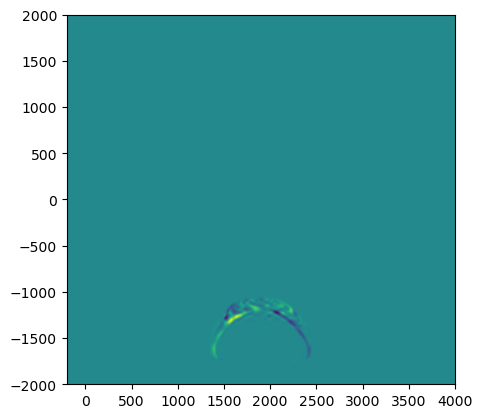

In [4]:
# Covering grid
x = np.linspace(-200, 4000, 5000)
y = np.linspace(-2000, 2000, 5000)
x1, y1 = np.meshgrid(x, y, indexing='ij')
 

plt.imshow(Ex((x1, y1)), extent=[x[0], x[-1], y[0], y[-1]], origin='lower')

In [ ]:
# Reconstruct MHD fluid velocity

ion_mass_ratio = 380
v_fx = (n_i((x1, y1)) * v_ix((x1, y1)) * ion_mass_ratio - n_e((x1, y1)) * v_ex((x1, y1))) / (n_i((x1, y1)) * ion_mass_ratio - n_e((x1, y1)))
v_fy = (n_i((x1, y1)) * v_iy((x1, y1)) * ion_mass_ratio - n_e((x1, y1)) * v_ey((x1, y1))) / (n_i((x1, y1)) * ion_mass_ratio - n_e((x1, y1)))
v_fz = (n_i((x1, y1)) * v_iz((x1, y1)) * ion_mass_ratio - n_e((x1, y1)) * v_ez((x1, y1))) / (n_i((x1, y1)) * ion_mass_ratio - n_e((x1, y1)))

TypeError: 'numpy.ndarray' object is not callable

In [13]:
# Verify E = - v_f x B
Ex_reconstructed = -(v_fy * Bz - v_fz * By)
Ey_reconstructed = -(v_fz * Bx - v_fx * Bz)
Ez_reconstructed = -(v_fx * By - v_fy * Bx)

plt.figure()
plt.subplot(1, 3, 1)
plt.title("Ex difference")
plt.imshow(Ex((x1, y1)) - Ex_reconstructed((x1, y1)), extent=[x[0], x[-1], y[0], y[-1]], origin='lower')
plt.colorbar()
plt.subplot(1, 3, 2)
plt.title("Ey difference")
plt.imshow(Ey((x1, y1)) - Ey_reconstructed((x1, y1)), extent=[x[0], x[-1], y[0], y[-1]], origin='lower')
plt.colorbar()
plt.subplot(1, 3, 3)
plt.title("Ez difference")
plt.imshow(Ez((x1, y1)) - Ez_reconstructed((x1, y1)), extent=[x[0], x[-1], y[0], y[-1]], origin='lower')
plt.colorbar()
plt.tight_layout()
plt.show()

NameError: name 'v_fy' is not defined